In [140]:
import numpy as np
import cmath
import math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm

z=  0.95


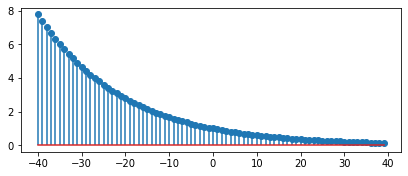

z=  1.05


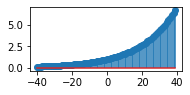

z=  -1.05


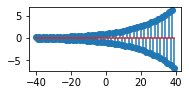

z=  -0.97


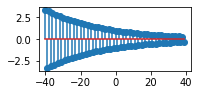

z=  1


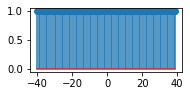

z=  -1


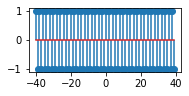

<Figure size 432x288 with 0 Axes>

In [141]:

n=range(-40,40)
z=[.95,1.05,-1.05,-.97,1,-1]
x1=[.95**i for i in n]
x2=[1.05**i for i in n]
x3=[(-1.05)**i for i in n]
x4=[(-.97)**i for i in n] 
x5=[1**i for i in n]
x6=[(-1)**i for i in n]
X=[x1,x2,x3,x4,x5,x6]
fig = plt.figure(10,figsize=(15,9))
for i, x in enumerate(X, start=1):
  plt.subplot(3,2,i)
  print("z= ",z[i-1])
  plt.stem(n,x,use_line_collection=True)
  plt.show()
plt.tight_layout()

In [142]:
n=np.linspace(-2,5,100)
z=[complex(-2,3),complex(2,-3),np.exp(complex(0,np.pi/10)),.95*np.exp(complex(0,np.pi/10)),1.05*np.exp(complex(0,np.pi/10))]
x1=[z[0]**i for i in n]
x2=[z[1]**i for i in n]
x3=[z[2]**i for i in n]
x4=[z[3]**i for i in n]
x5=[z[4]**i for i in n] 
X=[x1,x2,x3,x4,x5]

z =  (-2+3j)


<Figure size 432x288 with 0 Axes>

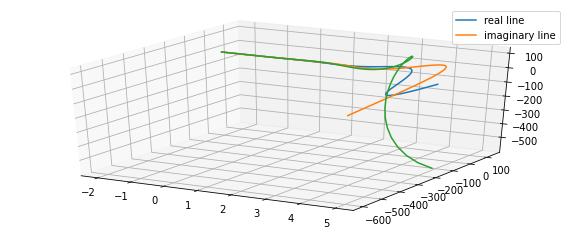

z =  (2-3j)


<Figure size 432x288 with 0 Axes>

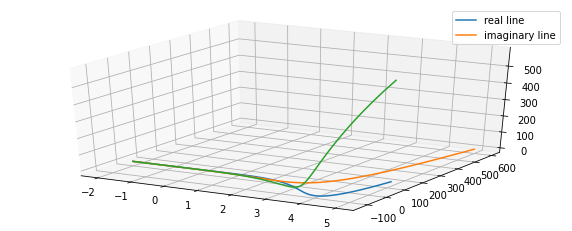

z =  (0.95+0.31j)


<Figure size 432x288 with 0 Axes>

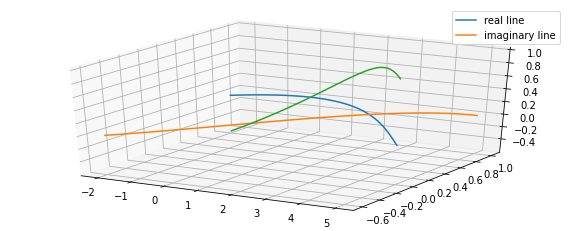

z =  (0.9+0.29j)


<Figure size 432x288 with 0 Axes>

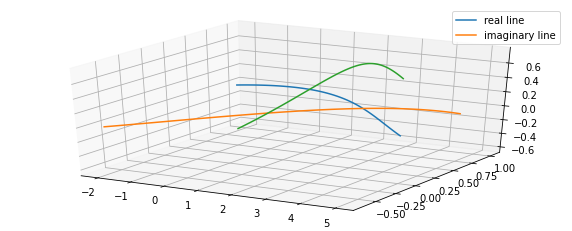

z =  (1+0.32j)


<Figure size 432x288 with 0 Axes>

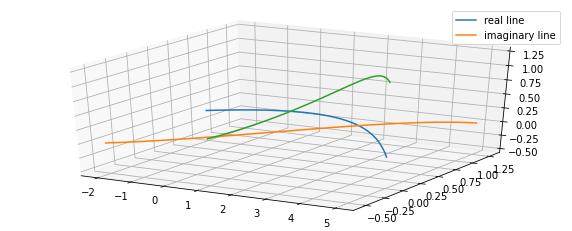

In [143]:
for i,x in enumerate(X):
    a=[j.real for j in x]
    b=[j.imag for j in x]
    fig = plt.figure(i)
    fig = plt.figure(figsize=(10,4))
    print("z = ",np.round(z[i],2))
    ax = fig.gca(projection='3d')
    plt.plot(n,a,label='real line')
    plt.plot(n,b,label='imaginary line')
    ax.plot(n,a,b)
    plt.legend()
    plt.show()

In [144]:
def impulse(n):
  return 1*(n==0)


def convolution(inputSeq,impulseResponse):
  inputSeq = np.array(inputSeq)
   
  impulseResponse = np.array(impulseResponse)
 
  m=len(inputSeq)
  n=len(impulseResponse)
  L=m+n-1
  inputSeq=np.pad(inputSeq,(0,L-m),'constant')
  impulseResponse=np.pad(impulseResponse,(0,L-n),'constant')
  outputSeq=np.zeros(L)
  for i in range(0,L):
    sum=0
    for j in range(0,i+1):
      sum=sum+impulseResponse[i-j]*inputSeq[j]
    outputSeq[i]=sum
  return outputSeq

**Z-Transform**

In [160]:
def impulse(n,d):
  return 1*((n-d)==0)
def unit(n):
  return 1*(n>=0)
def ramp(n):
  return n*(n>=0)


In [145]:
from sympy import  symbols
def Ztransform(xn,k):
  z=symbols('z')
  XZ=0
  for i in range(len(xn)):
    XZ=XZ+xn[i]*pow(z,-i)
  return XZ,[(XZ.subs(z,np.exp(complex(0,i))).evalf()) for i in k]

In [165]:
n=np.arange(0,4,1)
f=np.arange(0,5,.01)

h=2*impulse(n,3)
Hz,HZ=Ztransform(h,f)
xz1,XZ1=Ztransform(x1,f)
xz2,XZ2=Ztransform(x2,f)
xz3,XZ3=Ztransform(x3,f)
xz4,XZ4=Ztransform(x4,f)
xz5,XZ5=Ztransform(x5,f)
YZ1=[XZ1[i]*HZ[i] for i in range(len(XZ1))]
YZ2=[XZ2[i]*HZ[i] for i in range(len(XZ1))]
YZ3=[XZ3[i]*HZ[i] for i in range(len(XZ1))]
YZ4=[XZ4[i]*HZ[i] for i in range(len(XZ1))]
YZ5=[XZ5[i]*HZ[i] for i in range(len(XZ1))]
YZ=[YZ1,YZ2,YZ3,YZ4,YZ5]


eigen function 1


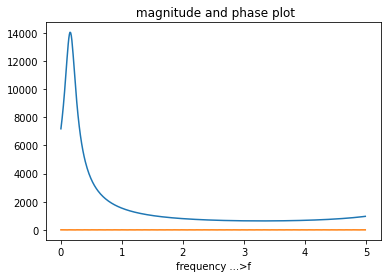

eigen function 2


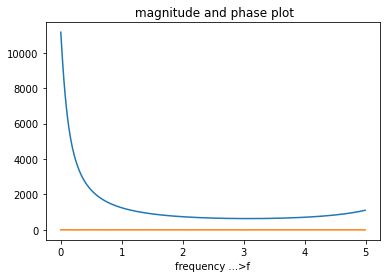

eigen function 3


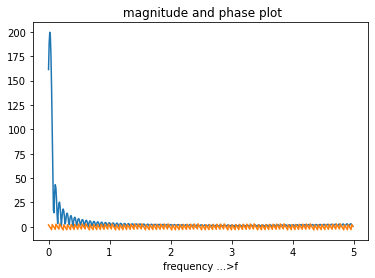

eigen function 4


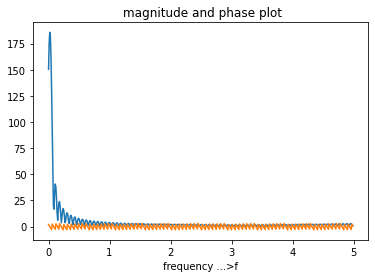

eigen function 5


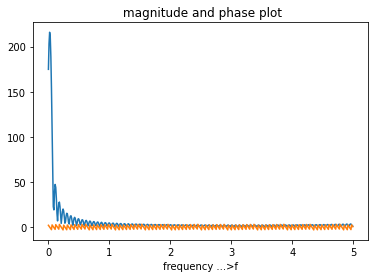

In [170]:
for k,yz in enumerate(YZ):
  plt.figure(k)
  print("eigen function",k+1)
  plt.plot(f,[abs(i) for i in yz],label="magnitude")
  plt.plot(f,[cmath.phase(i) for i in YZ2],label="phase(radian)")
  plt.title(" magnitude and phase plot")
  plt.xlabel("frequency ...>f")
  plt.show()


Z-Transform

In [ ]:
f=np.arange(0,5,.01)
n=np.arange(0,10,1)
a=.5
w=1
r=.2
#input sequence
xn1=impulse(n)
xn2=unit(n)
xn3=ramp(n)
xn4=a**n
xn5=n*xn4
xn6=r**n*np.cos(w*n)
# compunting z transform of each sequence
XZ1,XZ11=Ztransform(xn1,f)
XZ2,XZ22=Ztransform(xn2,f)
XZ3,XZ33=Ztransform(xn3,f)
XZ4,XZ44=Ztransform(xn4,f)
XZ5,XZ55=Ztransform(xn5,f)
XZ6,XZ66=Ztransform(xn6,f)


In [ ]:
print(" z transform of delta(n)  :  " ,XZ1)
print(" z transform of u(n)  :  " ,  XZ2)
print(" z transform of r(n)  :  " ,XZ3)
print(" z transform of a^n*u(n) :  " ,XZ4)
print(" z transform of n*(.5)^n*u(n) :  " ,XZ5)
print(" z transform of (.2)^n*cos(wn)*u(n)  :  " ,XZ6)

 z transform of delta(n)  :   1
 z transform of u(n)  :   1 + 1/z + z**(-2) + z**(-3) + z**(-4) + z**(-5) + z**(-6) + z**(-7) + z**(-8) + z**(-9)
 z transform of r(n)  :   1/z + 2/z**2 + 3/z**3 + 4/z**4 + 5/z**5 + 6/z**6 + 7/z**7 + 8/z**8 + 9/z**9
 z transform of a^n*u(n) :   1.0 + 0.5/z + 0.25/z**2 + 0.125/z**3 + 0.0625/z**4 + 0.03125/z**5 + 0.015625/z**6 + 0.0078125/z**7 + 0.00390625/z**8 + 0.001953125/z**9
 z transform of n*(.5)^n*u(n) :   0.5/z + 0.5/z**2 + 0.375/z**3 + 0.25/z**4 + 0.15625/z**5 + 0.09375/z**6 + 0.0546875/z**7 + 0.03125/z**8 + 0.017578125/z**9
 z transform of (.2)^n*cos(wn)*u(n)  :   1.0 + 0.108060461173628/z - 0.0166458734618857/z**2 - 0.00791993997280357/z**3 - 0.00104582979338178/z**4 + 9.07718993482324e-5/z**5 + 6.14508983456235e-5/z**6 + 9.6499488555943e-6/z**7 - 3.72480086550051e-7/z**8 - 4.66498694084955e-7/z**9


magnitude and phase plot


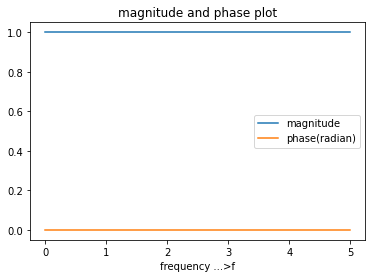

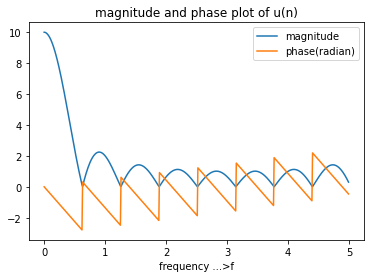

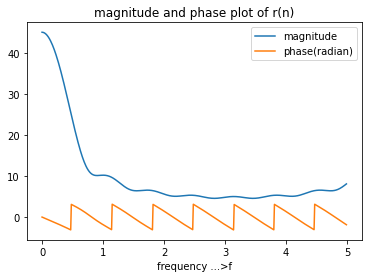

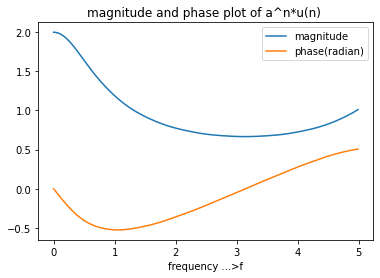

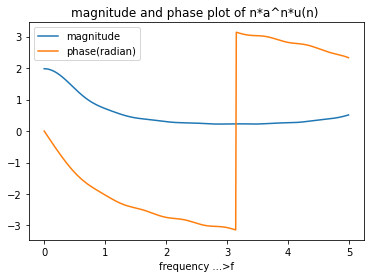

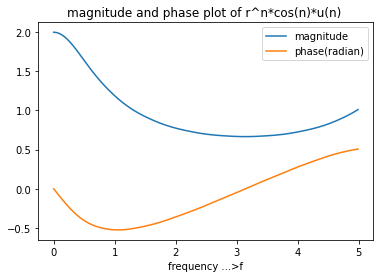

In [ ]:
plt.figure(1)
plt.plot(f,[abs(i) for i in XZ11],label="magnitude")
plt.plot(f,[cmath.phase(i) for i in XZ11],label="phase(radian)")
plt.legend()
plt.title("magnitude and phase plot")
plt.xlabel("frequency ...>f")
plt.show()

plt.figure(2)
plt.plot(f,[abs(i) for i in XZ22],label="magnitude")
plt.plot(f,[cmath.phase(i) for i in XZ22],label="phase(radian)")
plt.legend()
plt.title("magnitude and phase plot of u(n)")
plt.xlabel("frequency ...>f")
plt.show()

plt.figure(3)
plt.plot(f,[abs(i) for i in XZ33],label="magnitude")
plt.plot(f,[cmath.phase(i) for i in XZ33],label="phase(radian)")
plt.legend()
plt.title("magnitude and phase plot of r(n)")
plt.xlabel("frequency ...>f")
plt.show()

plt.figure(4)
plt.plot(f,[abs(i) for i in XZ44],label="magnitude")
plt.plot(f,[cmath.phase(i) for i in XZ44],label="phase(radian)")
plt.legend()
plt.title("magnitude and phase plot of a^n*u(n) ")
plt.xlabel("frequency ...>f")
plt.show()

plt.figure(5)
plt.plot(f,[abs(i) for i in XZ55],label="magnitude")
plt.plot(f,[cmath.phase(i) for i in XZ55],label="phase(radian)")
plt.legend()
plt.title("magnitude and phase plot of n*a^n*u(n) ")
plt.xlabel("frequency ...>f")
plt.show()

plt.figure(6)
plt.plot(f,[abs(i) for i in XZ44],label="magnitude")
plt.plot(f,[cmath.phase(i) for i in XZ44],label="phase(radian)")
plt.legend()
plt.title("magnitude and phase plot of r^n*cos(n)*u(n) ")
plt.xlabel("frequency ...>f")
plt.show()

**Discrete Time Fourier Series:**


In [ ]:
#discrete time fourier series coefficient
def dtfs_coff(xn,N):
  cn=list()
  for n in range(N):
    sum=0
    for k in range(N):
      sum+=xn[k]*np.exp(complex(0,-(2*np.pi*k*n)/N))
    cn.append(np.round(sum/N,3))
  return cn
# discrete time fourier series
def dtfs(xn,N):
  cn=dtfs_coff(xn,N)
  xk=list()
  for k in range(N):
    sum=0
    for n in range(N):
      sum+=cn[n]*np.exp(complex(0,(2*np.pi*k*n)/N))
    xk.append(np.round(sum,3))
  return xk



In [171]:
# a0=1
# a2=a(-2)*=exp(jpi/4)
# a4=a(-4)*=2exp(Jpi/3)
# N=5
# A(k)=A(N-k)
# a1=a(5-1)=a4=2exp(jpi/3)=a(-1)*
# a3=a(5-3)=a2=exp(jpi/4)=a(-3)*

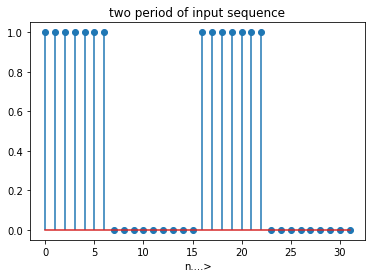

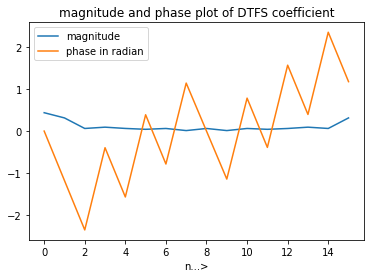

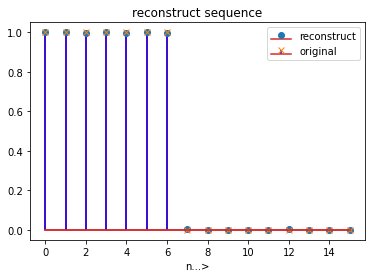

In [172]:
xn1=[1 for i in range(7) ]
xn2=[0 for i in range(16-7)]
xn=xn1+xn2
plt.figure(1)
plt.stem(xn+xn,use_line_collection=True)
plt.title("two period of input sequence")
plt.xlabel("n....>")
Cn=dtfs_coff(xn,16)
plt.figure(2)
plt.plot([abs(i) for i in Cn],label="magnitude")
plt.plot([cmath.phase(i) for i in Cn],label="phase in radian")
plt.title("magnitude and phase plot of DTFS coefficient")
plt.xlabel("n...>")
plt.legend()
plt.show()

Xk=dtfs(xn,16)
plt.figure(3)
n=np.arange(0,16,1)
plt.stem(n,[abs(i) for i in Xk],'r',markerfmt='o',label='reconstruct',use_line_collection=True)
plt.stem(n,xn,'b',markerfmt='x',label='original',use_line_collection=True)
plt.title("reconstruct sequence")
plt.xlabel("n...>")
plt.legend()
plt.show()


 contineous fourier series

In [173]:
def ctfs_coef(xt,T,n):
  cn=list()
  for i in range(n):
    sum=0
    for k,t in enumerate(xt):
      sum+=xt[k]*np.exp(complex(0,-(2*np.pi*t*i)/T))
    cn.append(np.round(sum/T,3))
   
  return cn

def ctfs(xt,T,n,t):
  Cn=ctfs_coef(xt,T,n)
  Xt=list()
  for t1 in t:
    x_t=0
    for n,cn in enumerate(Cn):
      x_t+=cn*np.exp(complex(0,(2*np.pi*n*t1/T)))
    Xt.append(np.round(x_t,3))
  return Xt



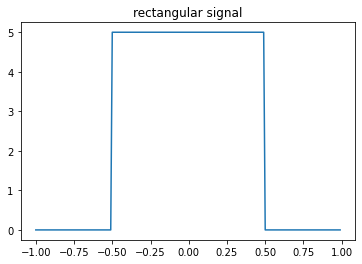

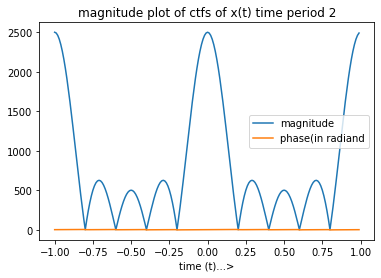

In [174]:
def rectangular(t,A):
    return A * (abs(t) < 0.5) 
t =np.arange(-1,1,.01)
xt=rectangular(t,5)
plt.figure(1)
plt.plot(t,xt)
plt.title("rectangular signal")
plt.show()
plt.figure(2)
Xt=ctfs(xt,1,5,t) #taking 5 number of fourier coefficient, 1 as time period  
plt.plot(t,[abs(i) for i in Xt],label="magnitude")
plt.plot(t,[cmath.phase(i) for i in Xt],label="phase(in radiand")
plt.title("magnitude plot of ctfs of x(t) time period 2")
plt.xlabel("time (t)...>")
plt.legend()
plt.show()

contineous fourier transform

In [175]:
#fourier transform
def cft(st,t,f):
  Sf=list()
  for i in f:
    sum=0
    for k,t1 in enumerate(t):
      sum+=st[k]*np.exp(complex(0,-2*np.pi*i*t1))
    Sf.append(np.round(sum,2))
  return Sf
#inverse fourier transform
def icft(sf,t,f):
  st=list()
  for i in t:
    sum=0
    for k,f1 in enumerate(f):
      sum+=sf[k]*np.exp(complex(0,2*np.pi*f1*i))
    st.append(np.round(sum,2)/(2*np.pi))
  return st
    



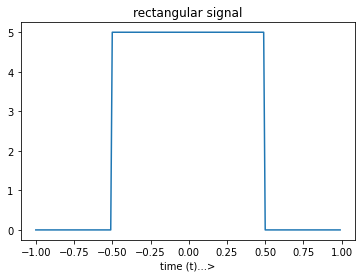

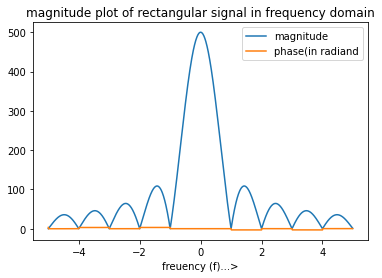

In [176]:
f=np.arange(-5,5,.01)
t =np.arange(-1,1,.01)
xt=rectangular(t,5)
Xf=cft(xt,t,f)
plt.figure(1)
plt.plot(t,xt)
plt.title("rectangular signal")
plt.xlabel("time (t)...>")
plt.show()

plt.figure(2)
plt.plot(f,[abs(i) for i in Xf],label="magnitude")
plt.plot(f,[cmath.phase(i) for i in Xf],label="phase(in radiand")
plt.title("magnitude plot of rectangular signal in frequency domain")
plt.xlabel("freuency (f)...>")
plt.legend()
plt.show()

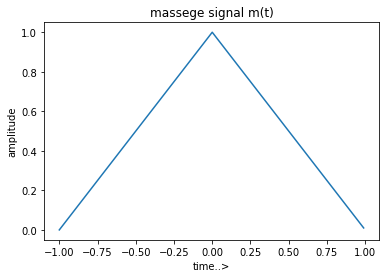

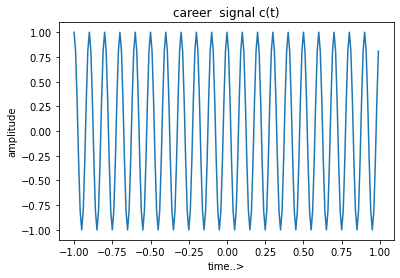

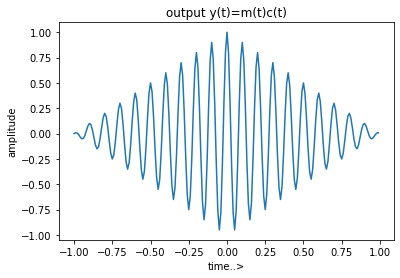

In [177]:
def triangular(t):
    return (1 - abs(t)) * (abs(t) < 1)

f=np.arange(-1,1,.01)
t =np.arange(-1,1,.01)

m_t=triangular(t)
f0=10
c_t=np.cos(2*np.pi*f0*t)
plt.figure(1)
plt.plot(t,m_t)
plt.title("massege signal m(t)")
plt.xlabel("time..>")
plt.ylabel("amplitude")
plt.show()
plt.figure(2)
plt.plot(t,c_t)
plt.title("career  signal c(t)")
plt.xlabel("time..>")
plt.ylabel("amplitude")
plt.show()

plt.figure(3)
plt.plot(t,[m_t[i]*c_t[i] for i in range(len(t))])
plt.title("output y(t)=m(t)c(t)")
plt.xlabel("time..>")
plt.ylabel("amplitude")
plt.show()

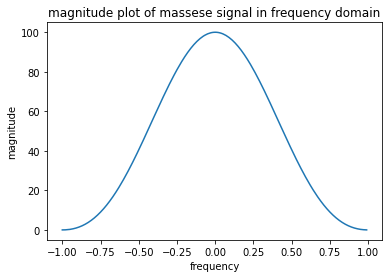

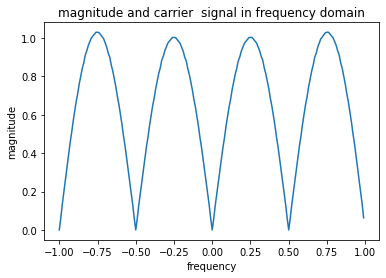

In [178]:
f=np.arange(-1,1,.01)
Mf=cft(m_t,t,f)
Cf=cft(c_t,t,f)
plt.figure(1)
plt.plot(f,[abs(i) for i in Mf])
plt.title("magnitude plot of massese signal in frequency domain")
plt.xlabel("frequency")
plt.ylabel("magnitude")
plt.show()
plt.figure(2)
plt.plot(f,[abs(i) for i in Cf])
plt.title("magnitude and carrier  signal in frequency domain")
plt.xlabel("frequency")
plt.ylabel("magnitude")
plt.show()
